In [1]:
# Code goal: test the reliability problem with sensobol package
# Author: Haochen Ye (hxy46@psu.edu)
#-------------
# Load sensobol library
rm(list = ls())
graphics.off()
library(sensobol)

# Problem definition: return yes if the product of two numbers >=0.75
Reliability<-function (X) {
  floor(X[ ,1]*X[ ,2]/0.75)
}

Warning message:
"package 'sensobol' was built under R version 3.6.3"

In [2]:
# Define input parameters, base sample size, bootstrap times, 
#   which order sensitivity index to estimate, and sampling method.
# Note that sensobol package requires generating parameter samples by its function. 
#   Thus using arbitrary user-defined samples doesn't work.
para<-c("X1","X2")
N<-50000
R<-100
order <- "second"
type <-"R" # Three options: LHS or QRN or R
# Required matrix form to calculate second-order indices
matrices=c("A", "B","AB","BA")

In [3]:

# Calculate every 500 samples
S1 <- S2 <- S3 <- rep(NA,100)
for (i in 1:100){
  n<-N/100*i
  mat<-sobol_matrices(N = n, params = para,order = order,type=type,matrices = matrices)
  y<-Reliability(mat)
  S <- sobol_indices(Y = y, N = n, params = para, order=order,
                       boot = TRUE, R = R, conf = 0.95)
  S1[i]<-S$results$original[1]
  S2[i]<-S$results$original[2]
  S3[i]<-S$results$original[5]
}

# Theoretical first-order Sobol sensitivity index
u <- 0.25-0.75*(log(1)-log(0.75))
V <- (1-u)*(0-u)^2 + u*(1-u)^2 
V1 <- 0.75*u^2 + 0.25*(1-u)^2 - 1.5*(1-u)*(log(1)-log(0.75)) + 0.75^2*(-1+1/0.75)
S_theoretical <- V1/V

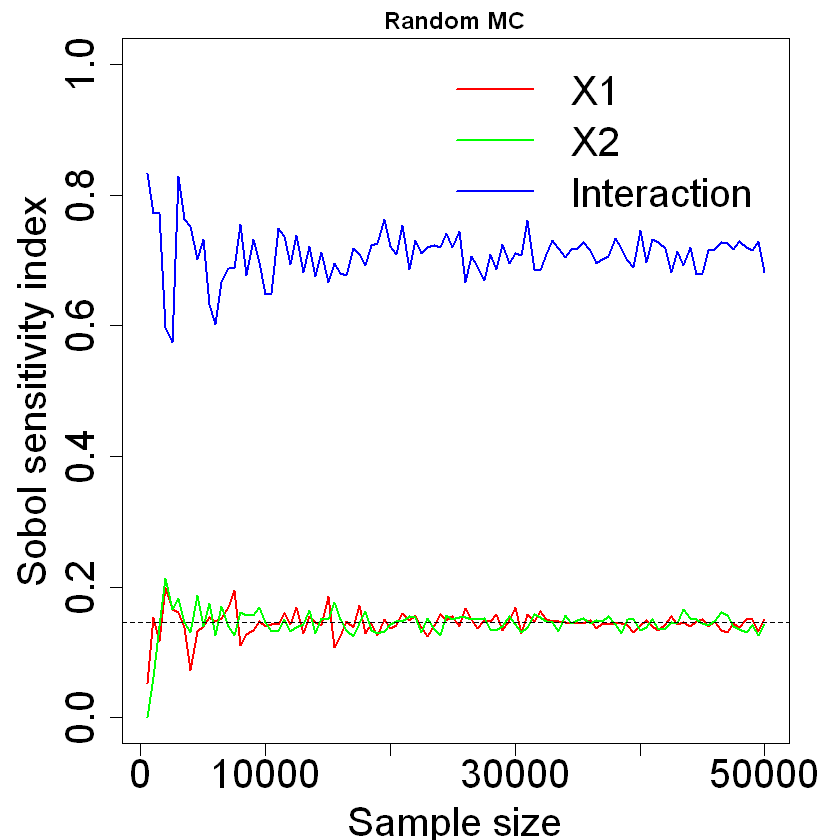

In [4]:

# Plot results 
par(mar=c(4,5.1,1.6,2.1))
plot(seq(N/100,N,by=N/100),S1,type="l",lwd=2,xlab="Sample size",ylab="Sobol sensitivity index",
     cex.lab=2,cex.axis=2,ylim=c(0,1),col="red")
lines(seq(N/100,N,by=N/100),S2,lwd=2,col="green")
lines(seq(N/100,N,by=N/100),S3,lwd=2,col="blue")
abline(h=S_theoretical,lty=2) # theoretical value of S1 and S2
legend("topright",lwd=c(2,2,2),col = c("red","green","blue"),
       legend = c("X1","X2","Interaction"),cex=2,bty="n")
if (type == "R")
  text <- "Random MC"
if (type == "QRN")
  text <- "Sobol sequence"
if (type == "LHS")
  text <- "LHS"
title(main = text,cex=2)

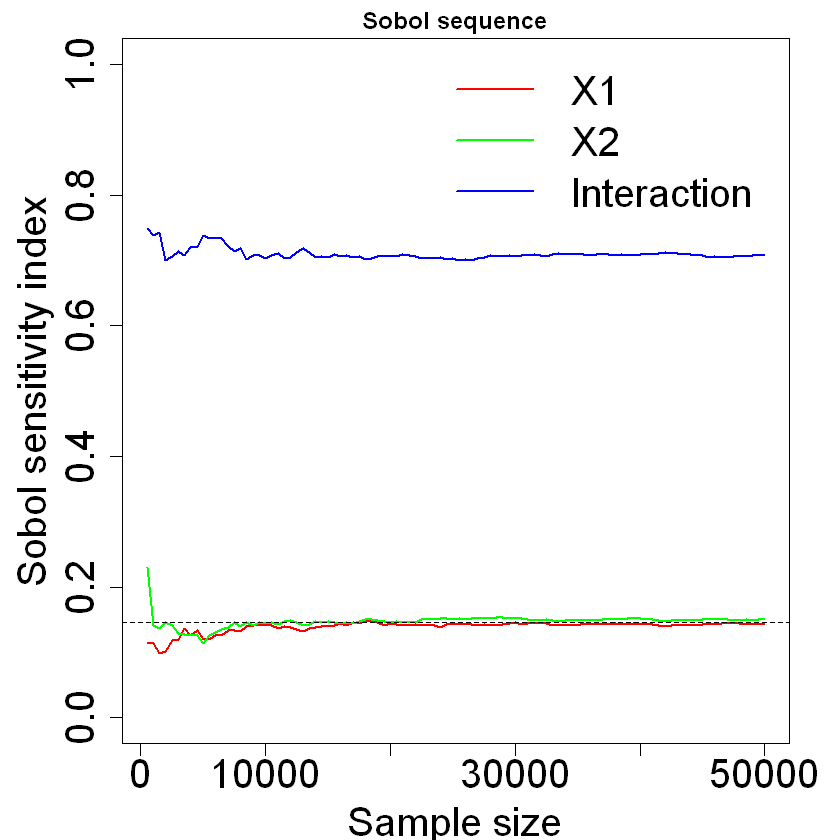

In [5]:
type<-"QRN"
# Calculate every 500 samples
S1 <- S2 <- S3 <- rep(NA,100)
for (i in 1:100){
  n<-N/100*i
  mat<-sobol_matrices(N = n, params = para,order = order,type=type,matrices = matrices)
  y<-Reliability(mat)
  S <- sobol_indices(Y = y, N = n, params = para, order=order,
                       boot = TRUE, R = R, conf = 0.95)
  S1[i]<-S$results$original[1]
  S2[i]<-S$results$original[2]
  S3[i]<-S$results$original[5]
}
# Plot results 
par(mar=c(4,5.1,1.6,2.1))
plot(seq(N/100,N,by=N/100),S1,type="l",lwd=2,xlab="Sample size",ylab="Sobol sensitivity index",
     cex.lab=2,cex.axis=2,ylim=c(0,1),col="red")
lines(seq(N/100,N,by=N/100),S2,lwd=2,col="green")
lines(seq(N/100,N,by=N/100),S3,lwd=2,col="blue")
abline(h=S_theoretical,lty=2) # theoretical value of S1 and S2
legend("topright",lwd=c(2,2,2),col = c("red","green","blue"),
       legend = c("X1","X2","Interaction"),cex=2,bty="n")
if (type == "R")
  text <- "Random MC"
if (type == "QRN")
  text <- "Sobol sequence"
if (type == "LHS")
  text <- "LHS"
title(main = text,cex=2)

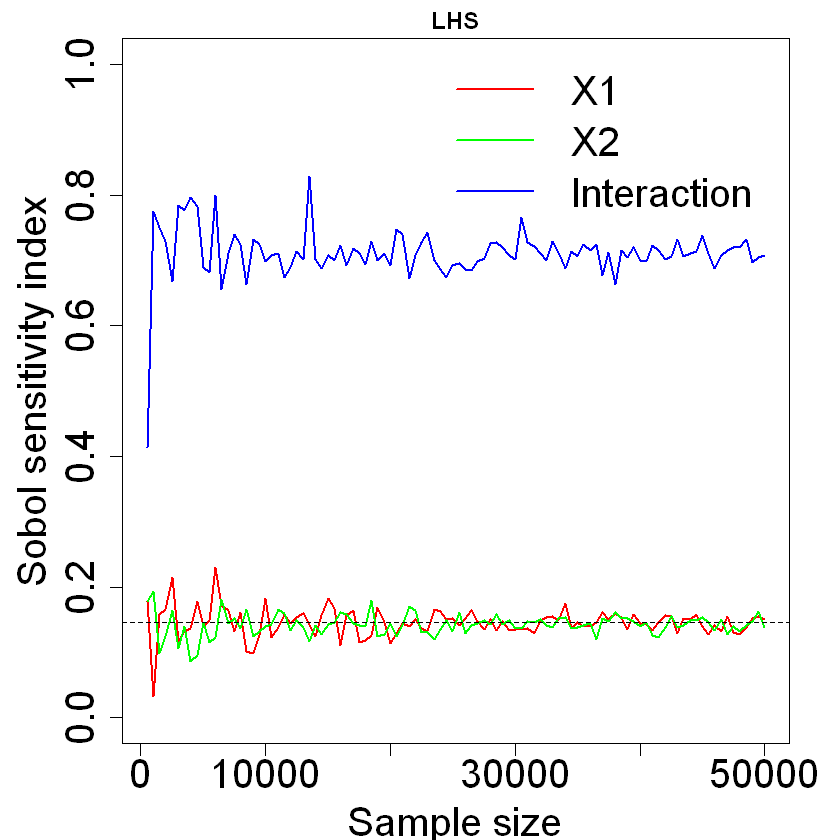

In [6]:
type<-"LHS"
# Calculate every 500 samples
S1 <- S2 <- S3 <- rep(NA,100)
for (i in 1:100){
  n<-N/100*i
  mat<-sobol_matrices(N = n, params = para,order = order,type=type,matrices = matrices)
  y<-Reliability(mat)
  S <- sobol_indices(Y = y, N = n, params = para, order=order,
                       boot = TRUE, R = R, conf = 0.95)
  S1[i]<-S$results$original[1]
  S2[i]<-S$results$original[2]
  S3[i]<-S$results$original[5]
}
# Plot results 
par(mar=c(4,5.1,1.6,2.1))
plot(seq(N/100,N,by=N/100),S1,type="l",lwd=2,xlab="Sample size",ylab="Sobol sensitivity index",
     cex.lab=2,cex.axis=2,ylim=c(0,1),col="red")
lines(seq(N/100,N,by=N/100),S2,lwd=2,col="green")
lines(seq(N/100,N,by=N/100),S3,lwd=2,col="blue")
abline(h=S_theoretical,lty=2) # theoretical value of S1 and S2
legend("topright",lwd=c(2,2,2),col = c("red","green","blue"),
       legend = c("X1","X2","Interaction"),cex=2,bty="n")
if (type == "R")
  text <- "Random MC"
if (type == "QRN")
  text <- "Sobol sequence"
if (type == "LHS")
  text <- "LHS"
title(main = text,cex=2)